In [33]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler





data=pd.read_csv("/Users/Tara/Downloads/Global_Mobility_Report (1).csv")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [34]:
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356279,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-31,NaN,NaN,NaN,NaN,-1.0,NaN
2356280,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-09-01,NaN,NaN,NaN,NaN,-2.0,NaN
2356281,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-09-02,NaN,NaN,NaN,NaN,5.0,NaN
2356282,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-09-03,NaN,NaN,NaN,NaN,6.0,NaN


In [35]:
data=data[data.country_region=="United States"]

In [36]:
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794395,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1794396,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
1794397,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
1794398,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
1794399,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332432,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-31,NaN,NaN,NaN,NaN,-21.0,NaN
2332433,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-09-01,NaN,NaN,NaN,NaN,-20.0,NaN
2332434,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-09-02,NaN,NaN,NaN,NaN,-20.0,NaN
2332435,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-09-03,NaN,NaN,NaN,NaN,-12.0,NaN


In [37]:
data=data[["country_region", "sub_region_1", "date", 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]

In [38]:
data

,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794395,United States,NaN,2020-02-15,6.0,2.0,3.0,2.0,-1.0
1794396,United States,NaN,2020-02-16,7.0,1.0,2.0,0.0,-1.0
1794397,United States,NaN,2020-02-17,6.0,0.0,-9.0,-24.0,5.0
1794398,United States,NaN,2020-02-18,0.0,-1.0,1.0,0.0,1.0
1794399,United States,NaN,2020-02-19,2.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2332432,United States,Wyoming,2020-08-31,NaN,NaN,NaN,-21.0,NaN
2332433,United States,Wyoming,2020-09-01,NaN,NaN,NaN,-20.0,NaN
2332434,United States,Wyoming,2020-09-02,NaN,NaN,NaN,-20.0,NaN
2332435,United States,Wyoming,2020-09-03,NaN,NaN,NaN,-12.0,NaN


In [39]:
data.dropna(axis=0, how="any", inplace=True)

<ipython-input-39-a41fd17ba840>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
unique=data.sub_region_1.unique()


In [41]:
# count=0

# for index, row in data.iterrows():
#     if row["sub_region_1"]=="Alabama":
#         count+=1
# print(count)

In [42]:
# count=0

# for index, row in data.iterrows():
#     if row["sub_region_1"]=="Wyoming":
#         count+=1
# print(count)

In [43]:
# count=0

# for index, row in data.iterrows():
#     if row["sub_region_1"]=="Connecticut":
#         count+=1
# print(count)

In [44]:
scaler=StandardScaler()
data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]) 

data




<ipython-input-44-a17db85ee869>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794598,United States,Alabama,2020-02-15,0.989149,0.140288,0.802510,1.783445,-1.443475
1794599,United States,Alabama,2020-02-16,0.732568,-0.163242,0.645974,1.606113,-1.156872
1794600,United States,Alabama,2020-02-17,0.886517,-0.011477,0.802510,0.660343,-0.726968
1794601,United States,Alabama,2020-02-18,0.527303,-0.239124,0.489437,1.724335,-1.013571
1794602,United States,Alabama,2020-02-19,0.937833,0.064405,0.685108,1.724335,-1.300174
...,...,...,...,...,...,...,...,...
2331610,United States,Wyoming,2020-05-07,0.116773,0.595582,1.193852,0.010126,-0.010461
2331611,United States,Wyoming,2020-05-08,0.219405,1.278523,2.407013,-0.048985,-0.010461
2331616,United States,Wyoming,2020-05-13,0.373354,0.671464,1.546060,0.069237,-0.010461
2331618,United States,Wyoming,2020-05-15,0.219405,0.823229,2.602684,0.128347,-0.153762


In [45]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
principal_components = pca.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
pca_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', "PC 3", "PC 4"])
print(pca.explained_variance_ratio_)
print("0.98260139 of the variance in the data is represented by these 4 principle components")
pca_data



[0.72008335 0.13991325 0.07695239 0.0456524 ]
0.98260139 of the variance in the data is represented by these 4 principle components


,PC 1,PC 2,PC 3,PC 4
0,2.354391,-1.143334,0.099191,0.097233
1,1.827137,-1.202345,0.203013,0.095342
2,1.404286,-0.310379,0.440112,0.362566
3,1.615274,-1.339801,0.121944,-0.034157
4,2.153825,-1.136191,0.070387,0.131507
...,...,...,...,...
156599,0.823165,0.676877,0.662480,-0.467199
156600,1.647464,1.454389,1.307348,-0.969484
156601,1.154456,0.829655,0.891517,-0.393623
156602,1.696530,1.056413,1.665581,-0.877865


In [46]:
# factor loadings are correlations of features and components- trying to find the latent factors

loadings = pd.DataFrame( pca.components_, columns=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]).T
loadings


,0,1,2,3
retail_and_recreation_percent_change_from_baseline,0.473530,0.209291,-0.048658,0.831408
grocery_and_pharmacy_percent_change_from_baseline,0.402169,0.622555,-0.528295,-0.414086
transit_stations_percent_change_from_baseline,0.434605,0.244480,0.825536,-0.263928
workplaces_percent_change_from_baseline,0.443293,-0.579767,-0.154791,-0.260003
residential_percent_change_from_baseline,-0.478162,0.415598,0.114311,-0.005850


In [47]:
print("'loadings' are also eigenvectors")
print("Greatest contributors to PC1: retail, grocery, transit, workplaces")
print("Greatest contributors to PC2: grocery, residential")
print("Greatest contributor to PC3: transit")
print("Greatest contributors to PC4: retail")

# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# could also do color matrix https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

'loadings' are also eigenvectors
Greatest contributors to PC1: retail, grocery, transit, workplaces
Greatest contributors to PC2: grocery, residential
Greatest contributor to PC3: transit
Greatest contributors to PC4: retail


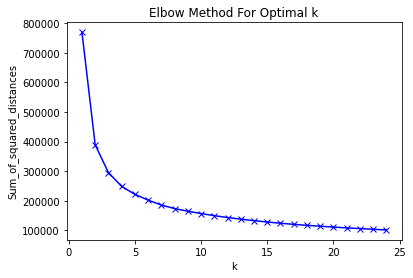

In [48]:
# find OPTIMAL value for kmeans
from sklearn.cluster import KMeans
data_kmeans = pd.DataFrame(pca_data)
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()






In [17]:
print(type(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]))

<class 'pandas.core.frame.DataFrame'>


In [18]:
# run KMeans
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(pca_data[['PC 1', 'PC 2', "PC 3", "PC 4"]])
pca_data['Cluster'] = y
# pca_data["State"]=data["sub_region_1"]
pca_data

,PC 1,PC 2,PC 3,PC 4,Cluster
0,2.354391,-1.143334,0.099191,0.097233,4
1,1.827137,-1.202345,0.203013,0.095342,4
2,1.404286,-0.310379,0.440112,0.362566,4
3,1.615274,-1.339801,0.121944,-0.034157,4
4,2.153825,-1.136191,0.070387,0.131507,4
...,...,...,...,...,...
156599,0.823165,0.676877,0.662480,-0.467199,2
156600,1.647464,1.454389,1.307348,-0.969484,0
156601,1.154456,0.829655,0.891517,-0.393623,0
156602,1.696530,1.056413,1.665581,-0.877865,0


In [19]:
ls_to_append=[]
for index, row in data.iterrows():
    ls_to_append.append(row["sub_region_1"])

# ls_to_append


In [20]:
series_to_add_to_pca_data=pd.Series(ls_to_append)
pca_data["State"]=series_to_add_to_pca_data
pca_data


,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,2.354391,-1.143334,0.099191,0.097233,4,Alabama
1,1.827137,-1.202345,0.203013,0.095342,4,Alabama
2,1.404286,-0.310379,0.440112,0.362566,4,Alabama
3,1.615274,-1.339801,0.121944,-0.034157,4,Alabama
4,2.153825,-1.136191,0.070387,0.131507,4,Alabama
...,...,...,...,...,...,...
156599,0.823165,0.676877,0.662480,-0.467199,2,Wyoming
156600,1.647464,1.454389,1.307348,-0.969484,0,Wyoming
156601,1.154456,0.829655,0.891517,-0.393623,0,Wyoming
156602,1.696530,1.056413,1.665581,-0.877865,0,Wyoming


In [21]:
pca_data.Cluster.unique()

array([4, 0, 2, 3, 1], dtype=int32)

In [22]:
c0={}
c1={}
c2={}
c3={}
c4={}
list_of_clusters=[c0,c1,c2,c3,c4]
for index, row in pca_data.iterrows():
    for i in range(0,5):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters[i]:
                list_of_clusters[i][row["State"]]+=1
            else:
                list_of_clusters[i][row["State"]]=1
                
                
print(list_of_clusters)

[{'Alabama': 483, 'Alaska': 91, 'Arizona': 356, 'Arkansas': 445, 'California': 350, 'Colorado': 301, 'Connecticut': 56, 'Delaware': 101, 'Florida': 344, 'Georgia': 484, 'Hawaii': 1, 'Idaho': 430, 'Illinois': 606, 'Indiana': 1345, 'Iowa': 631, 'Kansas': 311, 'Kentucky': 334, 'Louisiana': 437, 'Maine': 236, 'Maryland': 32, 'Massachusetts': 148, 'Michigan': 528, 'Minnesota': 120, 'Mississippi': 258, 'Missouri': 829, 'Montana': 525, 'Nebraska': 252, 'Nevada': 189, 'New Hampshire': 116, 'New Jersey': 172, 'New Mexico': 199, 'New York': 427, 'North Carolina': 413, 'North Dakota': 177, 'Ohio': 1554, 'Oklahoma': 772, 'Oregon': 575, 'Pennsylvania': 688, 'Rhode Island': 52, 'South Carolina': 429, 'South Dakota': 298, 'Tennessee': 732, 'Texas': 958, 'Utah': 525, 'Vermont': 27, 'Virginia': 335, 'Washington': 568, 'West Virginia': 211, 'Wisconsin': 497, 'Wyoming': 327}, {'Alabama': 70, 'Alaska': 62, 'Arizona': 209, 'Arkansas': 32, 'California': 1847, 'Colorado': 455, 'Connecticut': 289, 'Delaware':

In [23]:
states_clusters={}
for index, row in pca_data.iterrows():
    if row["State"] not in states_clusters:
        state_dict={}
        for i in range(0,5):
            if row["State"] in list_of_clusters[i]:
                state_dict[i]=list_of_clusters[i][row["State"]]
        print(state_dict)
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster=state_dict_keys[max_ind]
        states_clusters[row["State"]]=max_cluster
print(states_clusters)
    

{0: 483, 1: 70, 2: 1487, 3: 558, 4: 611}
{0: 91, 1: 62, 2: 205, 3: 75, 4: 179}
{0: 356, 1: 209, 2: 489, 3: 937, 4: 326}
{0: 445, 1: 32, 2: 1092, 3: 336, 4: 462}
{0: 350, 1: 1847, 2: 1946, 3: 2815, 4: 1153}
{0: 301, 1: 455, 2: 733, 3: 785, 4: 559}
{0: 56, 1: 289, 2: 417, 3: 375, 4: 312}
{0: 101, 1: 122, 2: 189, 3: 209, 4: 139}
{1: 147, 2: 2, 3: 28, 4: 26}
{0: 344, 1: 1166, 2: 1497, 3: 3344, 4: 1190}
{0: 484, 1: 368, 2: 2105, 3: 1475, 4: 951}
{0: 1, 1: 612, 2: 15, 3: 190, 4: 135}
{0: 430, 1: 33, 2: 281, 3: 182, 4: 322}
{0: 606, 1: 459, 2: 1593, 3: 1163, 4: 1033}
{0: 1345, 1: 304, 2: 1485, 3: 915, 4: 1215}
{0: 631, 1: 90, 2: 475, 3: 387, 4: 432}
{0: 311, 1: 89, 2: 708, 3: 327, 4: 526}
{0: 334, 1: 103, 2: 1172, 3: 629, 4: 563}
{0: 437, 1: 291, 2: 1533, 3: 910, 4: 599}
{0: 236, 1: 137, 2: 222, 3: 191, 4: 208}
{0: 32, 1: 676, 2: 512, 3: 945, 4: 483}
{0: 148, 1: 749, 2: 480, 3: 736, 4: 395}
{0: 528, 1: 831, 2: 920, 3: 771, 4: 807}
{0: 120, 1: 333, 2: 619, 3: 653, 4: 427}
{0: 258, 1: 43, 2: 10

In [24]:
clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 0:[]}

for i in states_clusters.keys():
    for j in range(0,5):
        if states_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)


{1: ['District of Columbia', 'Hawaii', 'Massachusetts'], 2: ['Alabama', 'Alaska', 'Arkansas', 'Connecticut', 'Georgia', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], 3: ['Arizona', 'California', 'Colorado', 'Delaware', 'Florida', 'Maryland', 'Minnesota', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'Rhode Island'], 4: [], 0: ['Idaho', 'Iowa', 'Maine', 'Montana', 'South Dakota', 'Wyoming']}


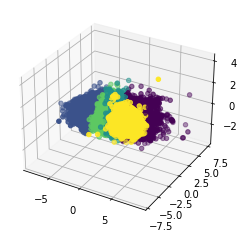

In [25]:
# 4d plot for april kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data["PC 1"]
y = pca_data["PC 2"]
z = pca_data["PC 3"]
z = pca_data["PC 4"]

categories = np.unique(pca_data["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_data["Color"] = pca_data["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=pca_data.Color)


# fig.colorbar(img)
plt.show()


In [26]:
num=0
pca_2=pd.DataFrame(columns=['PC 1', 'PC 2', "PC 3", "PC 4", "Cluster", "State"])
for index, row in pca_data.iterrows():
    if num%100==0:
        pca_2=pca_2.append({"PC 1": row["PC 1"],"PC 2": row["PC 2"],"PC 3": row["PC 3"],"PC 4": row["PC 4"]+1,"Cluster": row["Cluster"],"State": row["State"] }, ignore_index=True)
    num+=1
pca_2.head


<bound method NDFrame.head of           PC 1      PC 2      PC 3      PC 4 Cluster    State
0     2.354391 -1.143334  0.099191  1.097233       4  Alabama
1    -1.729728  1.719860  0.457237  1.366056       3  Alabama
2     0.806779  0.160688  0.244880  1.379074       2  Alabama
3     1.609379  1.262085 -0.582437  0.837796       0  Alabama
4     1.980533  0.283411  0.042739  0.575715       0  Alabama
...        ...       ...       ...       ...     ...      ...
1562 -1.359212  0.538214  0.253513  0.735028       3  Wyoming
1563  1.226888  0.753202  0.668202  0.675220       0  Wyoming
1564 -0.970658  0.399314 -0.437251  0.867314       3  Wyoming
1565  1.342484  0.760758 -0.061508  0.813799       0  Wyoming
1566  1.647464  1.454389  1.307348  0.030516       0  Wyoming

[1567 rows x 6 columns]>

In [27]:
pca_2

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,2.354391,-1.143334,0.099191,1.097233,4,Alabama
1,-1.729728,1.719860,0.457237,1.366056,3,Alabama
2,0.806779,0.160688,0.244880,1.379074,2,Alabama
3,1.609379,1.262085,-0.582437,0.837796,0,Alabama
4,1.980533,0.283411,0.042739,0.575715,0,Alabama
...,...,...,...,...,...,...
1562,-1.359212,0.538214,0.253513,0.735028,3,Wyoming
1563,1.226888,0.753202,0.668202,0.675220,0,Wyoming
1564,-0.970658,0.399314,-0.437251,0.867314,3,Wyoming
1565,1.342484,0.760758,-0.061508,0.813799,0,Wyoming


In [28]:
clusters_and_their_states.values()

dict_values([['District of Columbia', 'Hawaii', 'Massachusetts'], ['Alabama', 'Alaska', 'Arkansas', 'Connecticut', 'Georgia', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], ['Arizona', 'California', 'Colorado', 'Delaware', 'Florida', 'Maryland', 'Minnesota', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'Rhode Island'], [], ['Idaho', 'Iowa', 'Maine', 'Montana', 'South Dakota', 'Wyoming']])

In [29]:
vals=list(clusters_and_their_states.values())
keys=list(clusters_and_their_states.keys())
for index, row in pca_2.iterrows():
    for i in range(len(vals)):
        if row["State"] in vals[i]:
            pca_2.at[index, "Cluster"]= keys[i]
pca_2
            
            
    

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,2.354391,-1.143334,0.099191,1.097233,2,Alabama
1,-1.729728,1.719860,0.457237,1.366056,2,Alabama
2,0.806779,0.160688,0.244880,1.379074,2,Alabama
3,1.609379,1.262085,-0.582437,0.837796,2,Alabama
4,1.980533,0.283411,0.042739,0.575715,2,Alabama
...,...,...,...,...,...,...
1562,-1.359212,0.538214,0.253513,0.735028,0,Wyoming
1563,1.226888,0.753202,0.668202,0.675220,0,Wyoming
1564,-0.970658,0.399314,-0.437251,0.867314,0,Wyoming
1565,1.342484,0.760758,-0.061508,0.813799,0,Wyoming


In [49]:
# 5d plot for  kmeans




import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = pca_2["Cluster"]
markersize = (pca_2['PC 4']+8)

#Make Plotly figure
fig1 = go.Scatter3d(x=pca_2["PC 1"],
                    y=pca_2["PC 2"],
                    z=pca_2["PC 3"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Rainbow'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Principal Component 1"),
                                yaxis=dict( title="Principal Component 2"),
                                zaxis=dict(title="Principal Component 3")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("Google Mobility KMeans.html")
                   )


'Google Mobility KMeans.html'